# Heart stroke prediction using Random Forest

In [1]:
import pandas as pd

# Load the data
file_path = r"C:\Users\roari\Downloads\Brain.csv"
data = pd.read_csv(file_path)

In [13]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
data.shape

(4981, 11)

In [5]:
data.size


54791

In [7]:
data.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [11]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [17]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

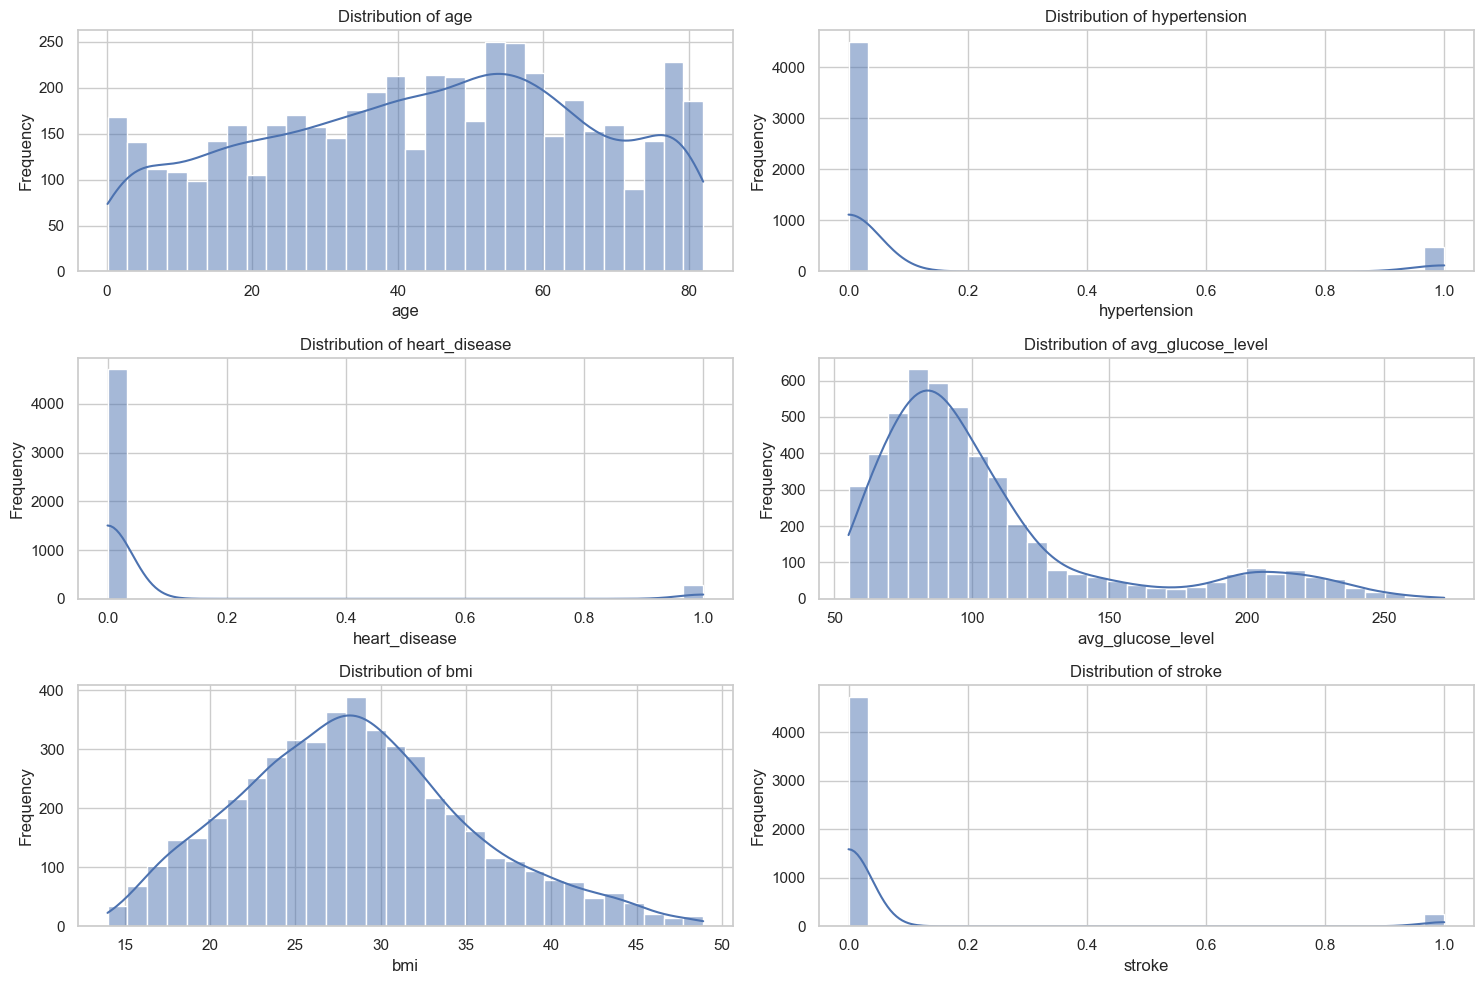

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Create histograms for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)  # Create a 3x2 grid of subplots
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


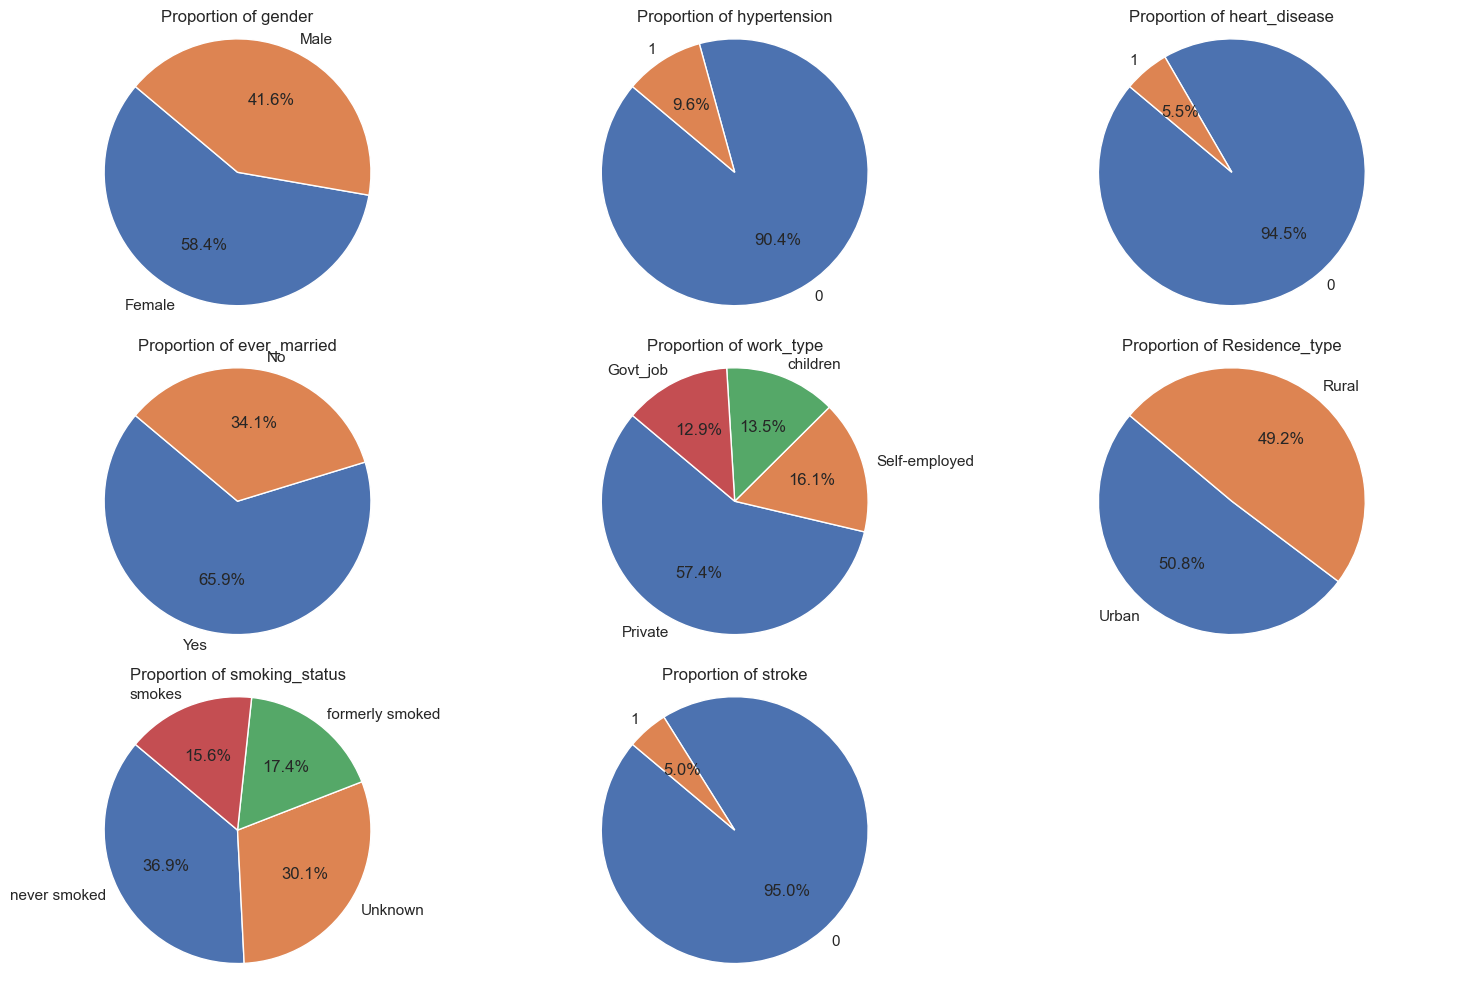

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(15, 10))

# List of categorical columns to plot
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Create pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    data_counts = data[column].value_counts()
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Adjust layout
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

# Assuming 'data' is your DataFrame

# List of numerical columns to check for outliers
numerical_columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']

# Function to identify outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outlier_indices = []
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers = df[(df[column] < (Q1 - outlier_step)) | (df[column] > (Q3 + outlier_step))]
        outlier_indices.extend(outliers.index.tolist())
    return list(set(outlier_indices))  # Return unique indices of outliers

# Detect outliers
outlier_indices_iqr = detect_outliers_iqr(data, numerical_columns)

# Display the outliers
outliers_iqr = data.loc[outlier_indices_iqr]
print("Outliers detected using IQR method:")
outliers_iqr


Outliers detected using IQR method:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
2035,Female,80.0,0,1,Yes,Self-employed,Rural,103.06,28.8,never smoked,0
4077,Female,81.0,0,1,Yes,Govt_job,Urban,90.11,28.6,never smoked,0
162,Female,74.0,0,0,Yes,Self-employed,Urban,74.96,26.6,never smoked,1
2040,Male,78.0,1,0,Yes,Self-employed,Rural,75.19,27.6,never smoked,0


In [27]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Sample data creation (Replace this with your actual DataFrame loading)
# data = pd.read_csv('C:\\Users\\roari\\Downloads\\Brain.csv')

# Define the numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Remove outliers
cleaned_data = remove_outliers_iqr(data, numerical_columns)

# Display the shape of the cleaned DataFrame
print("Original data shape:", data.shape)
print("Cleaned data shape:", cleaned_data.shape)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
cleaned_data


Original data shape: (4981, 11)
Cleaned data shape: (4337, 11)
Cleaned DataFrame:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [31]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Sample data creation (Replace this with your actual DataFrame loading)
# data = pd.read_csv('C:\\Users\\roari\\Downloads\\Brain.csv')

# Performing one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Display the shape and the first few rows of the encoded DataFrame
print("Shape of the encoded DataFrame:", data_encoded.shape)
print("First few rows of the encoded DataFrame:")
data_encoded.head()

Shape of the encoded DataFrame: (4981, 15)
First few rows of the encoded DataFrame:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,True,False,False,True,True,False,False
1,80.0,0,1,105.92,32.5,1,True,True,True,False,False,False,False,True,False
2,49.0,0,0,171.23,34.4,1,False,True,True,False,False,True,False,False,True
3,79.0,1,0,174.12,24.0,1,False,True,False,True,False,False,False,True,False
4,81.0,0,0,186.21,29.0,1,True,True,True,False,False,True,True,False,False


In [39]:
# Transform True/False to 1/0
data_encoded = data_encoded.astype(int)

# Display the transformed DataFrame
print("Transformed DataFrame:")
data_encoded

Transformed DataFrame:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,1,1,0,0,1,1,0,0
1,80,0,1,105,32,1,1,1,1,0,0,0,0,1,0
2,49,0,0,171,34,1,0,1,1,0,0,1,0,0,1
3,79,1,0,174,24,1,0,1,0,1,0,0,0,1,0
4,81,0,0,186,29,1,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41,0,0,70,29,0,1,0,1,0,0,0,1,0,0
4977,40,0,0,191,31,0,1,1,1,0,0,1,0,0,1
4978,45,1,0,95,31,0,0,1,0,0,0,0,0,0,1
4979,40,0,0,83,30,0,1,1,1,0,0,0,0,0,1


In [43]:
import pandas as pd

# Assuming 'data_encoded' is your DataFrame after one-hot encoding
# Sample data creation (Replace this with your actual DataFrame loading)
# data_encoded = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Calculating the count of stroke occurrences
stroke_counts = data_encoded['stroke'].value_counts()

# Calculating the proportion of each stroke value
stroke_proportion = stroke_counts / stroke_counts.sum()

# Display the results
print("Count of Stroke occurrences:")
print(stroke_counts)
print("\nProportion of Stroke occurrences (0 and 1):")
print(stroke_proportion)


Count of Stroke occurrences:
stroke
0    4733
1     248
Name: count, dtype: int64

Proportion of Stroke occurrences (0 and 1):
stroke
0    0.950211
1    0.049789
Name: count, dtype: float64


In [47]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming 'data_encoded' is your DataFrame
# Separate the features and the target variable
X = data_encoded.drop('stroke', axis=1)  # Features
y = data_encoded['stroke']                # Target variable

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced['stroke'] = y_resampled

# Display the new balance of the dataset
stroke_counts_balanced = data_balanced['stroke'].value_counts()
print("Count of Stroke occurrences after balancing:")
print(stroke_counts_balanced)

# Proportions after balancing
stroke_proportion_balanced = stroke_counts_balanced / stroke_counts_balanced.sum()
print("\nProportion of Stroke occurrences after balancing:")
print(stroke_proportion_balanced)


Count of Stroke occurrences after balancing:
stroke
1    4733
0    4733
Name: count, dtype: int64

Proportion of Stroke occurrences after balancing:
stroke
1    0.5
0    0.5
Name: count, dtype: float64


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy: 95.12%
Test Accuracy: 95.41%

Precision:  [0.95449735 0.95363541]
Recall:  [0.95348837 0.95464135]
F1 Score:  [0.9539926  0.95413811]
Support:  [946 948]


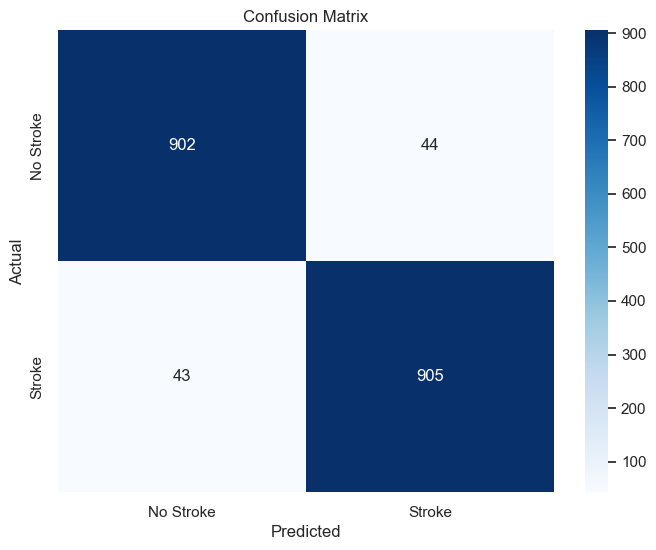

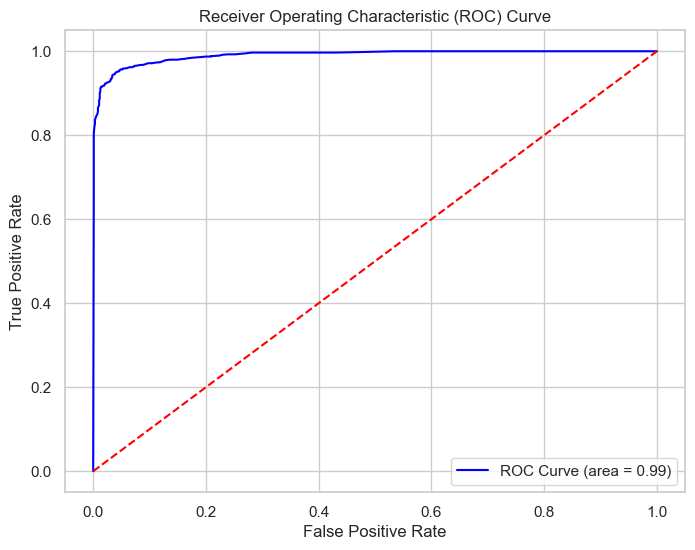

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_balanced' is your balanced DataFrame after SMOTE
# Split the data into features and target variable
X = data_balanced.drop('stroke', axis=1)  # Features
y = data_balanced['stroke']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate Precision, Recall, F1 Score, and Support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
print("\nPrecision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Support: ", support)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_probs = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [51]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[902  44]
 [ 43 905]]
